<a href="https://colab.research.google.com/github/KeremAydin98/dimensionality-reduction/blob/main/dimensionality_reduction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
from sklearn import datasets
from sklearn.decomposition import PCA, IncrementalPCA, KernelPCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import LocallyLinearEmbedding

In [3]:
iris = datasets.load_iris()

In [4]:
X = iris.data
y = iris.target
target_names = iris.target_names

In [5]:
X.shape, y.shape

((150, 4), (150,))

In [6]:
def plotting_dimensionality_reduction(x_reduced, dim_red_name, target_names=target_names):

  colors = ["red", "blue", "green"]
  lw = 2

  plt.figure(figsize=(8,8))

  for color, i, target_name in zip(colors, [0,1,2], target_names):

    plt.scatter(x_reduced[y==i, 0], x_reduced[y==i, 1], color=color, alpha=0.8, lw=lw, label=target_name)

  plt.legend()
  plt.title(dim_red_name)
  plt.show()

# PCA

## Regular PCA

In [7]:
pca = PCA(n_components=2, svd_solver="full")
x_reduced = pca.fit(X).transform(X)

In [8]:
print(pca.explained_variance_)

[4.22824171 0.24267075]


In [9]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


In [10]:
x_reduced.shape

(150, 2)

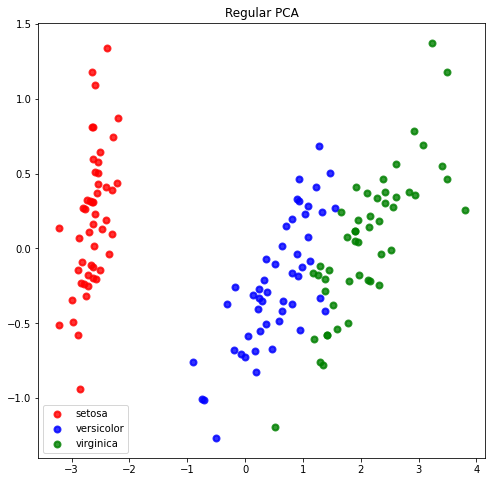

In [11]:
plotting_dimensionality_reduction(x_reduced, "Regular PCA")

## Randomized PCA

In [12]:
pca = PCA(n_components=2, svd_solver="randomized")
x_reduced_2 = pca.fit(X).transform(X)

In [13]:
print(pca.explained_variance_ratio_)

[0.92461872 0.05306648]


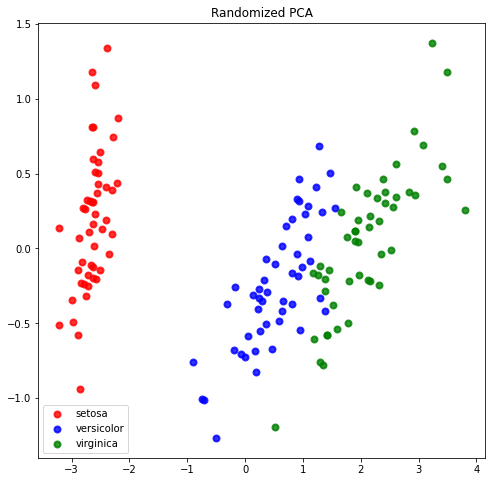

In [14]:
plotting_dimensionality_reduction(x_reduced_2, "Randomized PCA")

# Incremental PCA

In [15]:
from keras.datasets import mnist

In [16]:
(x_dig, y_dig), (_, _) = mnist.load_data()

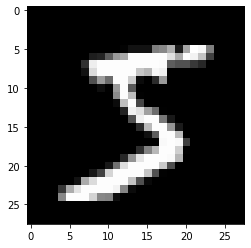

In [17]:
plt.imshow(x_dig[0], cmap="gray")
plt.show()

In [18]:
x_dig.shape

(60000, 28, 28)

In [19]:
x_dig = x_dig.reshape([60000, 784])

In [20]:
n_batches = 100

inc_pca = IncrementalPCA(n_components=196)

for x_batch in np.array_split(x_dig, n_batches):

  inc_pca.partial_fit(x_batch)

x_reduced_3 = inc_pca.transform(x_dig)

In [21]:
type(x_reduced_3), x_reduced_3.shape

(numpy.ndarray, (60000, 196))

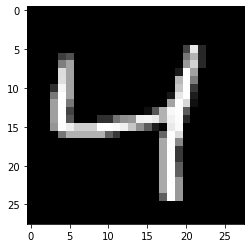

In [22]:
plt.imshow(x_dig.reshape((60000,28,28))[2],cmap="gray")
plt.show()

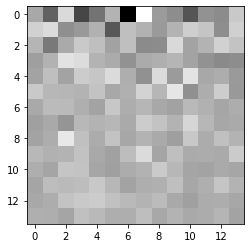

In [23]:
plt.imshow(x_reduced_3.reshape((60000,14,14))[2],cmap="gray")
plt.show()

In [24]:
print(inc_pca.explained_variance_ratio_)

[0.09704664 0.07095923 0.06169088 0.05389418 0.04868796 0.0431223
 0.03271928 0.02883894 0.02762027 0.02356998 0.02109187 0.02022989
 0.01715815 0.01692108 0.01578638 0.01482949 0.01324557 0.01276893
 0.01187259 0.01152679 0.01066161 0.01006708 0.00953567 0.00912538
 0.00883398 0.00839313 0.00812573 0.00786359 0.00744725 0.00690852
 0.00658086 0.0064814  0.00602605 0.00586573 0.00570011 0.00543617
 0.00505776 0.00487847 0.00481417 0.00472254 0.00456736 0.00444821
 0.00418489 0.003982   0.00384957 0.00375089 0.00361994 0.00351576
 0.00340041 0.00321853 0.00319    0.00312788 0.00295961 0.00288932
 0.00284109 0.00271415 0.00269499 0.00258446 0.00253749 0.00244754
 0.00240477 0.00239239 0.00230383 0.00221503 0.00213692 0.0020719
 0.00203011 0.00196752 0.00192817 0.00188597 0.0018694  0.00181045
 0.00177525 0.00174859 0.0016572  0.0016386  0.00161422 0.00155067
 0.00147566 0.00143122 0.00142045 0.00141104 0.00140119 0.00135684
 0.00133793 0.00132341 0.00130101 0.00125806 0.00122768 0.001215

# Kernel PCA

In [31]:
sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)

In [32]:
sr_points.shape

(1500, 3)

Text(0.5, 0.92, 'Swiss Roll in Ambient Space')

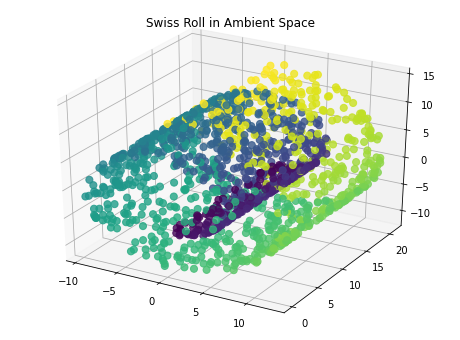

In [33]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")

In [44]:
k_pca = KernelPCA(n_components=2, kernel='rbf')
X_transformed = k_pca.fit_transform(sr_points)

In [45]:
X_transformed.shape

(1500, 2)

Text(0.5, 0.92, 'Swiss Roll in Ambient Space')

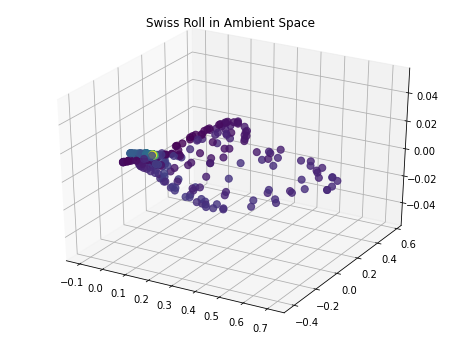

In [46]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    X_transformed[:, 0], X_transformed[:, 1], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")

# LLE

In [38]:
sr_points, sr_color = datasets.make_swiss_roll(n_samples=1500, random_state=0)

Text(0.5, 0.92, 'Swiss Roll in Ambient Space')

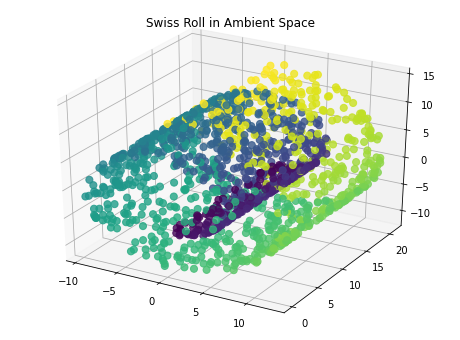

In [39]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    sr_points[:, 0], sr_points[:, 1], sr_points[:, 2], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")

In [41]:
lle = LocallyLinearEmbedding(n_components=2)
X_transformed = lle.fit_transform(sr_points)

Text(0.5, 0.92, 'Swiss Roll in Ambient Space')

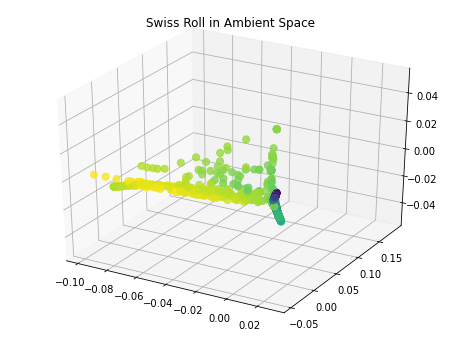

In [43]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection="3d")

ax.scatter(
    X_transformed[:, 0], X_transformed[:, 1], c=sr_color, s=50, alpha=0.8
)
ax.set_title("Swiss Roll in Ambient Space")